In [106]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error

In [55]:
df = pd.read_excel('Данные_мес_2015-2022.xls', index_col= 'Месяц', parse_dates = True)
df

,sum_ord
Месяц,
2015-01-01,3928.403136
2015-02-01,4514.402329
2015-03-01,5051.333045
2015-04-01,5227.228255
2015-05-01,4303.208287
...,...
2022-08-01,10975.203577
2022-09-01,11288.849011
2022-10-01,10976.697271


# Линейная регрессия

### Компоненты вр. ряда

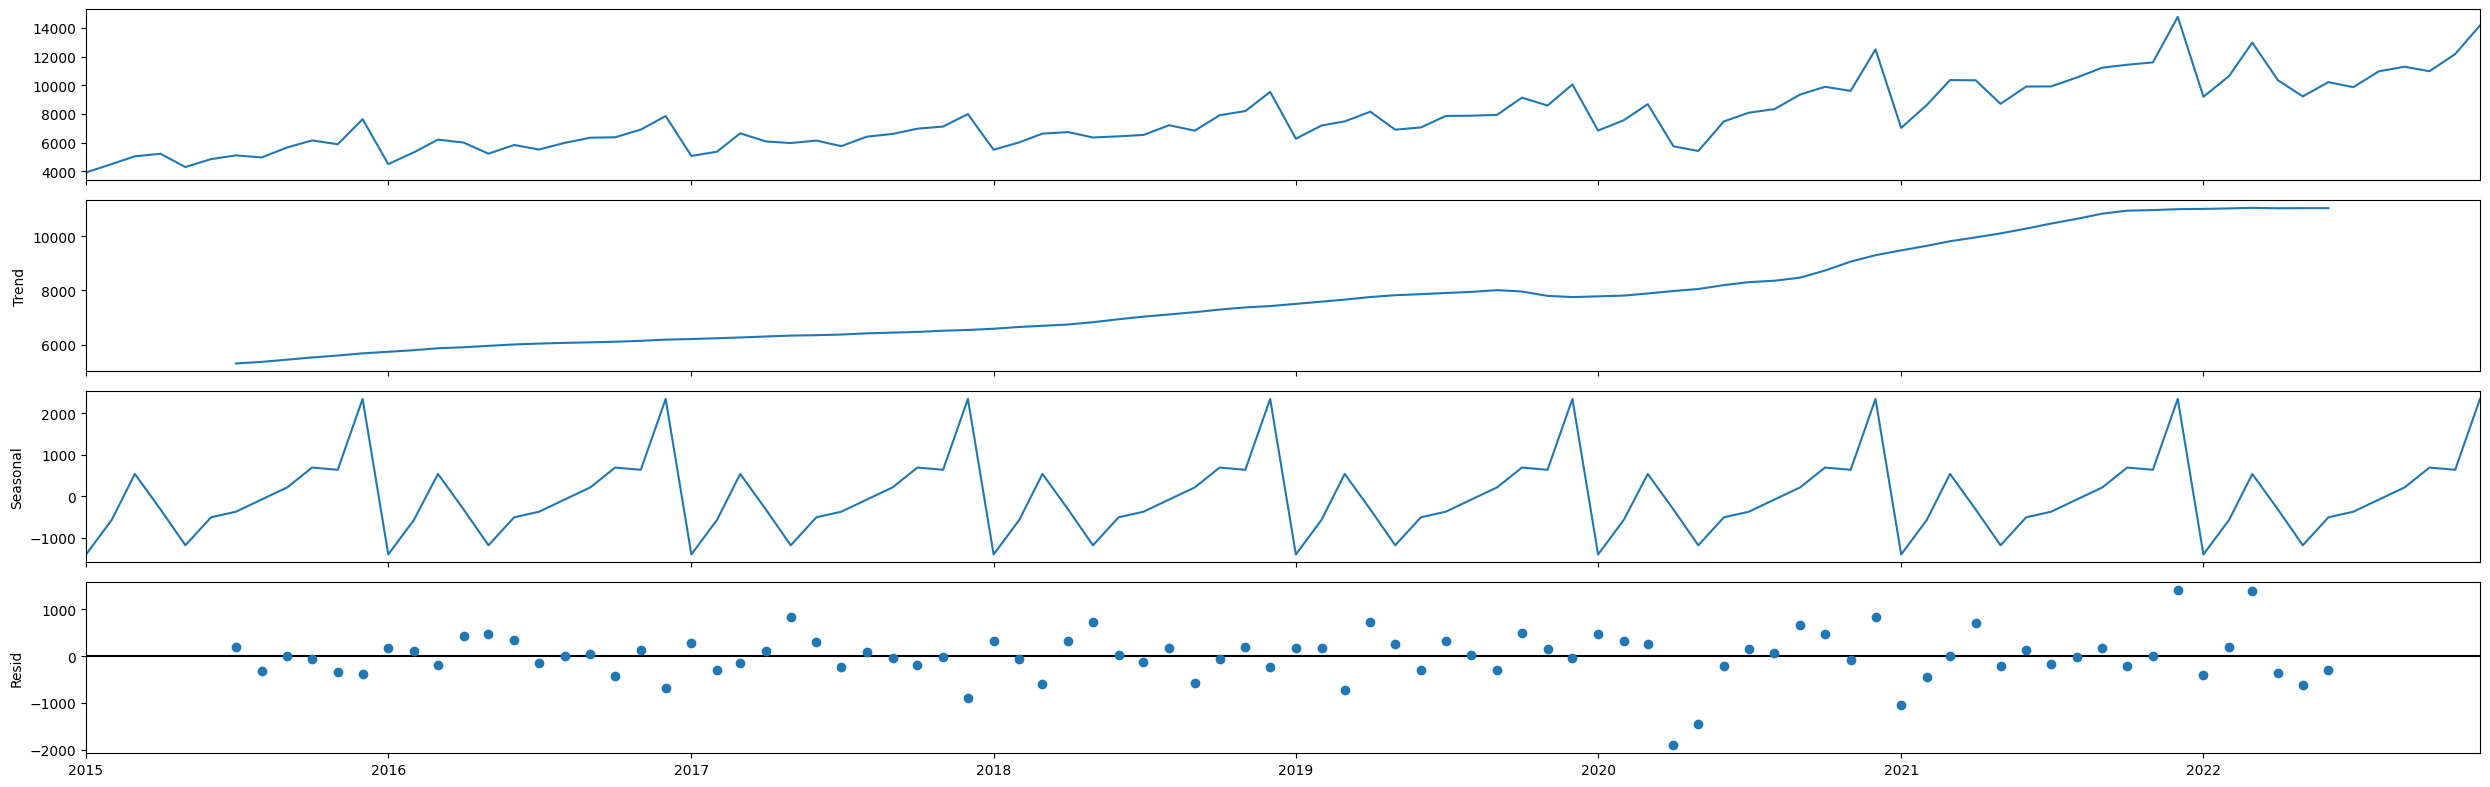

In [56]:
import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(df)
plt.rc('figure', figsize = (25,8))
resplot = res.plot()

### Лаговые данные
значения за пред. моменты времени

In [57]:
# с помощью шифта смотрим сдивгаем данные на 1
df['sum_ord'].shift(1).head(5)

Месяц
2015-01-01            NaN
2015-02-01    3928.403136
2015-03-01    4514.402329
2015-04-01    5051.333045
2015-05-01    5227.228255
Name: sum_ord, dtype: float64

In [61]:
for i in range(1,6):
    df[f"lag_{i}"] = df['sum_ord'].shift(i)
df.head(10)

,sum_ord,lag_1,lag_2,lag_3,lag_4,lag_5
Месяц,,,,,,
2015-04-01,5227.228255,NaN,NaN,NaN,NaN,NaN
2015-05-01,4303.208287,5227.228255,NaN,NaN,NaN,NaN
2015-06-01,4858.455773,4303.208287,5227.228255,NaN,NaN,NaN
2015-07-01,5115.232791,4858.455773,4303.208287,5227.228255,NaN,NaN
2015-08-01,4972.275787,5115.232791,4858.455773,4303.208287,5227.228255,NaN
2015-09-01,5670.373870,4972.275787,5115.232791,4858.455773,4303.208287,5227.228255
2015-10-01,6159.415783,5670.373870,4972.275787,5115.232791,4858.455773,4303.208287
2015-11-01,5891.877527,6159.415783,5670.373870,4972.275787,5115.232791,4858.455773
2015-12-01,7637.706742,5891.877527,6159.415783,5670.373870,4972.275787,5115.232791


In [62]:
df.dropna(inplace=True)
df.head()

,sum_ord,lag_1,lag_2,lag_3,lag_4,lag_5
Месяц,,,,,,
2015-09-01,5670.373870,4972.275787,5115.232791,4858.455773,4303.208287,5227.228255
2015-10-01,6159.415783,5670.373870,4972.275787,5115.232791,4858.455773,4303.208287
2015-11-01,5891.877527,6159.415783,5670.373870,4972.275787,5115.232791,4858.455773
2015-12-01,7637.706742,5891.877527,6159.415783,5670.373870,4972.275787,5115.232791
2016-01-01,4507.854486,7637.706742,5891.877527,6159.415783,5670.373870,4972.275787


### Разбивает данные на train  и test

In [68]:
train = df.loc['01.01.2015':'31.12.2020']
test  = df.loc['01.01.2021':'31.12.2022']


In [76]:
X_train = train.drop('sum_ord', axis=1)
y_train = train['sum_ord']

X_test = test.drop('sum_ord', axis=1)
y_test = test['sum_ord']

### Обучаем линейную регрессию

Text(0.5, 1.0, 'Линейная регрессия\n Mean abs error 1240.4125695083287')

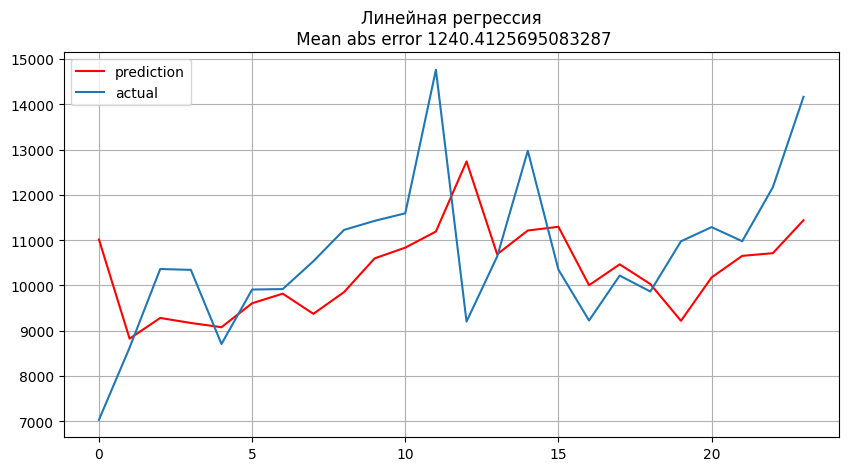

In [81]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

preds = lr.predict(X_test)

plt.figure(figsize=(10,5))
plt.plot(preds, "r", label = "prediction")
plt.plot(y_test.values, label="actual")
plt.grid(True)
plt.legend(loc="best")
plt.title(f"Линейная регрессия\n Mean abs error {mean_absolute_error(preds, y_test)}")


### Улучшаем модель

In [84]:
# функция, которая возвращает словарь, где ключаами являются уник. категории признака cat_feature, а знеачениями  - средние по real_future
def code_mean(data, cat_feature, real_feature):
    return dict(data.groupby(cat_feature)[real_feature].mean())

In [87]:
data = df.copy()

df['month'] = df.index.month
df['year'] = df.index.year
df.head()

,sum_ord,lag_1,lag_2,lag_3,lag_4,lag_5,month,year
Месяц,,,,,,,,
2015-09-01,5670.373870,4972.275787,5115.232791,4858.455773,4303.208287,5227.228255,9,2015
2015-10-01,6159.415783,5670.373870,4972.275787,5115.232791,4858.455773,4303.208287,10,2015
2015-11-01,5891.877527,6159.415783,5670.373870,4972.275787,5115.232791,4858.455773,11,2015
2015-12-01,7637.706742,5891.877527,6159.415783,5670.373870,4972.275787,5115.232791,12,2015
2016-01-01,4507.854486,7637.706742,5891.877527,6159.415783,5670.373870,4972.275787,1,2016


In [90]:
code_mean(df, 'year', 'sum_ord')

{2015: 6339.843480435,
 2016: 6011.635278769168,
 2017: 6349.958272185834,
 2018: 6996.5228918625,
 2019: 7878.5519160916665,
 2020: 8293.736330825,
 2021: 10370.750672174167,
 2022: 11004.371844561667}

### Готовим одну большую функцию, объединяющую все шаги

In [115]:
def preprocess_date( data, lag_start=1, lag_end=8, date_cut='31.12.2020'):
    data = pd.DataFrame(data.copy())
    
    # добавляем лани исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data[f"lag_{i}"] = data['sum_ord'].shift(i)
        
    data = data.dropna()
    
    data["month"] = data.index.month
    
    #считаем средние только по тренировочноый части 
    data["month_average"] = list(map(code_mean(data.loc[:date_cut], "month", "sum_ord").get, data.month))
    
    # удаляем вспом колонку
    data.drop(["month"], axis=1, inplace=True)
    
    # Разбиваем весь датасет на тренировочную и тестовую выюорку
    X_train = data.loc[:date_cut].drop(['sum_ord'], axis=1)
    y_train = data.loc[:date_cut]['sum_ord']

    X_test = data.loc[date_cut:].drop(['sum_ord'], axis=1)
    y_test = data.loc[date_cut:]['sum_ord']
    
    return X_train, X_test, y_train, y_test
    

In [112]:
# на всякий случай берем новые данные, чтобы избежать каких-то изменений, которые могли внести 
df = pd.read_excel('Данные_мес_2015-2022.xls', index_col= 'Месяц', parse_dates = True)

# разбиваем данные
X_train, X_test, y_train, y_test = preprocess_date(df)
X_train.shape, X_test.shape

((53, 8), (36, 8))

Text(0.5, 1.0, 'Линейная регрессия\n Mean abs error 0.10353229177132364')

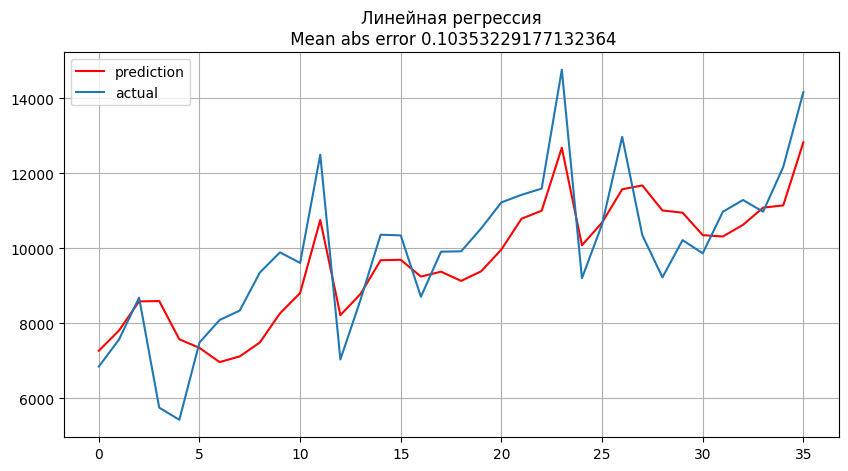

In [114]:
lr = LinearRegression()
lr.fit(X_train, y_train)

preds = lr.predict(X_test)

plt.figure(figsize=(10,5))
plt.plot(preds, "r", label = "prediction")
plt.plot(y_test.values, label="actual")
plt.grid(True)
plt.legend(loc="best")
plt.title(f"Линейная регрессия\n Mean abs error {mean_absolute_percentage_error(preds, y_test)}")